## Logistic Regression
- 인공신경망의 기본개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변환 함수  
   => scipy.special.sigmoid(), scipy.special.softmax(), scipy.special.expit()

### 성적 - 합격/불합격 분류 실습

In [129]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit,softmax

#### 1) 데이터 준비

In [130]:
x=[78,82,91,94,97] # 점수
y=[0,0,1,1,1] # 합격여부(1:합격, 0:불합격)

In [131]:
# 학습에 사용할 수 있도록 형변환
arrx=np.array(x).reshape(-1,1)
arry=np.array(y)

In [132]:
# 데이터 체크
print(f"arrx : {arrx.shape}, arry : {arry.shape}")

arrx : (5, 1), arry : (5,)


#### 2) 데이터 확인 => 시각화

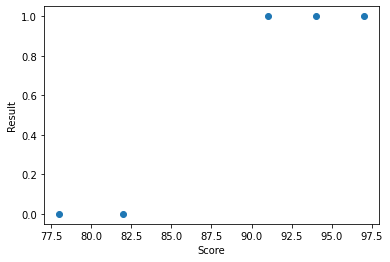

In [133]:
# 현재 데이터 시각화
plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

#### 3) 모델 생성 & 학습

In [134]:
# 객체생성
model=LogisticRegression()

In [135]:
# 학습
model.fit(arrx,arry)

LogisticRegression()

In [136]:
# 학습 후 설정된 속성
print(f"분류 종류 : {model.classes_}") # 정답 추출정보를 출력
print(f"가중치 값 : {model.coef_}")
print(f"절편 값 : {model.intercept_}")
print(f"특성 개수 : {model.n_features_in_}")

분류 종류 : [0 1]
가중치 값 : [[0.62705118]]
절편 값 : [-54.1941992]
특성 개수 : 1


#### 4) 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
  - 2개 점수 비교해서 과대적합, 과소적합 체크

In [137]:
model.score(arrx,arry)

1.0

- 테스트 데이터가 따로 없으므로 정확도는 1이 나옴

#### 5) 테스트 => predict(): 새로운 데이터로 진행

In [138]:
# arrx의 예측
prey=model.predict(arrx)
prey

array([0, 0, 1, 1, 1])

In [139]:
# 50점일 때 합격 여부
prey=model.predict([[50]])
prey

array([0])

In [140]:
# 90점 일 때 합격 여부
prey=model.predict([[90]])
prey

array([1])

In [141]:
# 89점 일 때 합격 여부
prey=model.predict([[89]])
prey

array([1])

In [142]:
# 87점 일 때 합격 여부
prey=model.predict([[87]])
prey

array([1])

In [143]:
# 86점 일 때 합격 여부
prey=model.predict([[86]])
prey

array([0])

- 86밑으로는 불합격이 나옴

In [144]:
# 82점일 때 합격확률과 불합격확률
print(f"분류항목 : {model.classes_}")
print(f"예측확률 : {model.predict_proba([[82]])}")

분류항목 : [0 1]
예측확률 : [[0.94136517 0.05863483]]


In [145]:
# 결정함수
model.decision_function([[82]]) 

array([-2.77600232])

In [146]:
# y=Wx+b : 모델 파라미터
model.coef_*82+model.intercept_

array([[-2.77600232]])

- 결정함수와 회귀식의 예측값은 서로 동일함

In [147]:
# y=Wx+b : 모델 파라미터
model.coef_*86+model.intercept_

array([[-0.26779759]])

In [148]:
# y=Wx+b : 모델 파라미터
model.coef_*87+model.intercept_

array([[0.35925359]])

In [149]:
# 결정함수 y=wx+b
ret=model.decision_function([[87]])
print(np.round(ret, 3))

[0.359]


In [150]:
# expit, softmax
print(f"expit : {expit(ret)}")
print(f"softmax : {softmax(ret)}")

expit : [0.58885974]
softmax : [1.]


In [151]:
# 실패 성공 확률
print(f"80점의 예측 확률 {np.round(model.predict_proba([[80]]),2)}")
print(f"95점의 예측 확률 {np.round(model.predict_proba([[95]]),2)}")

80점의 예측 확률 [[0.98 0.02]]
95점의 예측 확률 [[0. 1.]]


- 87점부터 회귀식 값이 양수가 되는 것을 확인

### 점수(이진분류[A,B])

In [152]:
# 데이터 불러오기 
X=[82,85, 87, 92, 94, 97] # 점수
y=['B','B','B','A','A','A'] # 학점

In [153]:
# 배열
arrx=np.array(X).reshape(-1,1)
arry=np.array(y)

# 객체 생성
model=LogisticRegression()

# 객체훈련
model.fit(arrx,arry)

# 훈련 후
print(f"회귀계수 {model.coef_}")
print(f"절편 {model.intercept_}")

# 객체평가
print(f"정확도 : {model.score(arrx,arry)}")

# 객체예측
print(model.predict([[50]]))
print(model.predict([[87]]))
print(model.predict([[89]]))
print(model.predict([[90]]))
print(model.predict([[99]]))

# 분류의 확률
print('분류항목 : ', model.classes_)
print('예측확률 : ', np.round(model.predict_proba([[50]]),2))
print('예측확률 : ', np.round(model.predict_proba([[87]]),2))
print('예측확률 : ', np.round(model.predict_proba([[89]]),2))
print('예측확률 : ', np.round(model.predict_proba([[90]]),2))
print('예측확률 : ', np.round(model.predict_proba([[99]]),2))

회귀계수 [[-0.8204321]]
절편 [73.42867468]
정확도 : 1.0
['B']
['B']
['B']
['A']
['A']
분류항목 :  ['A' 'B']
예측확률 :  [[0. 1.]]
예측확률 :  [[0.11 0.89]]
예측확률 :  [[0.4 0.6]]
예측확률 :  [[0.6 0.4]]
예측확률 :  [[1. 0.]]


- 위의 합격여부와는 다르게 데이터가 많으므로 90점대 부터가 A라고 예측을 함

In [154]:
# 결정함수 y=wx+b
ret=model.decision_function([[100]])
print(np.round(ret, 3))

[-8.615]


In [155]:
# expit, softmax
print(f"expit : {expit(ret)}")
print(f"softmax : {softmax(ret)}")

expit : [0.00018142]
softmax : [1.]


In [156]:
# 실패 성공 확률
print(f"80점의 예측 확률 {np.round(model.predict_proba([[80]]),2)}")
print(f"95점의 예측 확률 {np.round(model.predict_proba([[95]]),2)}")

80점의 예측 확률 [[0. 1.]]
95점의 예측 확률 [[0.99 0.01]]


- 이 모델은 회귀계수가 마이너스라서 예측값이 작을수록 A가 될 확률이 높음

### 3개 분류 점수

In [168]:
# 데이터 불러오기
x=[71, 74,78, 82,85, 87, 92, 94, 97]    # 점수
y=['C','C','C','B','B','B','A','A','A'] # 학점

In [159]:
# 배열로 변환
arrx=np.array(x).reshape(-1,1)
arry=np.array(y)


In [167]:
# 모델
model=LogisticRegression(max_iter=100).fit(arrx,arry)

print(f"분류종류: {model.classes_}, 분류개수 : {model.n_features_in_}")
print(f"회귀계수 : {model.coef_}")
print(f"절편 : {model.intercept_}")

print(f"정확도: {model.score(arrx,arry)}")
print(f"70점 예측값: {model.predict([[70]])}")

print(f"85점의 결정함수: {model.decision_function([[85]])}")
print(f"85점의 결정함수 확률(expit): {expit(model.decision_function([[85]]))}")
print(f"85점의 결정함수 확률(softmax): {softmax(model.decision_function([[85]]))}") # 전체 합이 1
print(f"85점의 분류별 될 확률: {model.predict_proba([[85]])}")

분류종류: ['A' 'B' 'C'], 분류개수 : 1
회귀계수 : [[ 0.81689356]
 [-0.00293966]
 [-0.8139539 ]]
절편 : [-70.52883025   2.84206703  67.68676322]
정확도: 1.0
70점 예측값: ['C']
85점의 결정함수: [[-1.09287792  2.59219616 -1.49931809]]
85점의 결정함수 확률(expit): [[0.25107674 0.93035765 0.18252725]]
85점의 결정함수 확률(softmax): [[0.02408821 0.95986864 0.01604315]]
85점의 분류별 될 확률: [[0.02408821 0.95986864 0.01604315]]
